# Wine Quality Prediction

## Признаки

* fixed acidity - титруемая кислотность
* volatile acidity - летучая кислотность
* citric acid - лимонная кислота
* resudial sugar - остаточный сахар
* chlorides - хлориды
* free sulfur dioxide - свободный диоксид серы
* total sulfur dioxide - общее кол-во диоксида серы
* density - плотность
* pH - водородный показатель
* suphates - сульфаты
* alcohol - процент спирта

## Целевой признак

* quality - оценка вина

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%matplotlib inline

In [2]:
df_wine = pd.read_csv('data/kr/winequality_red.csv')

df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df_wine.shape

(1599, 12)

## Разведочный анализ

In [4]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


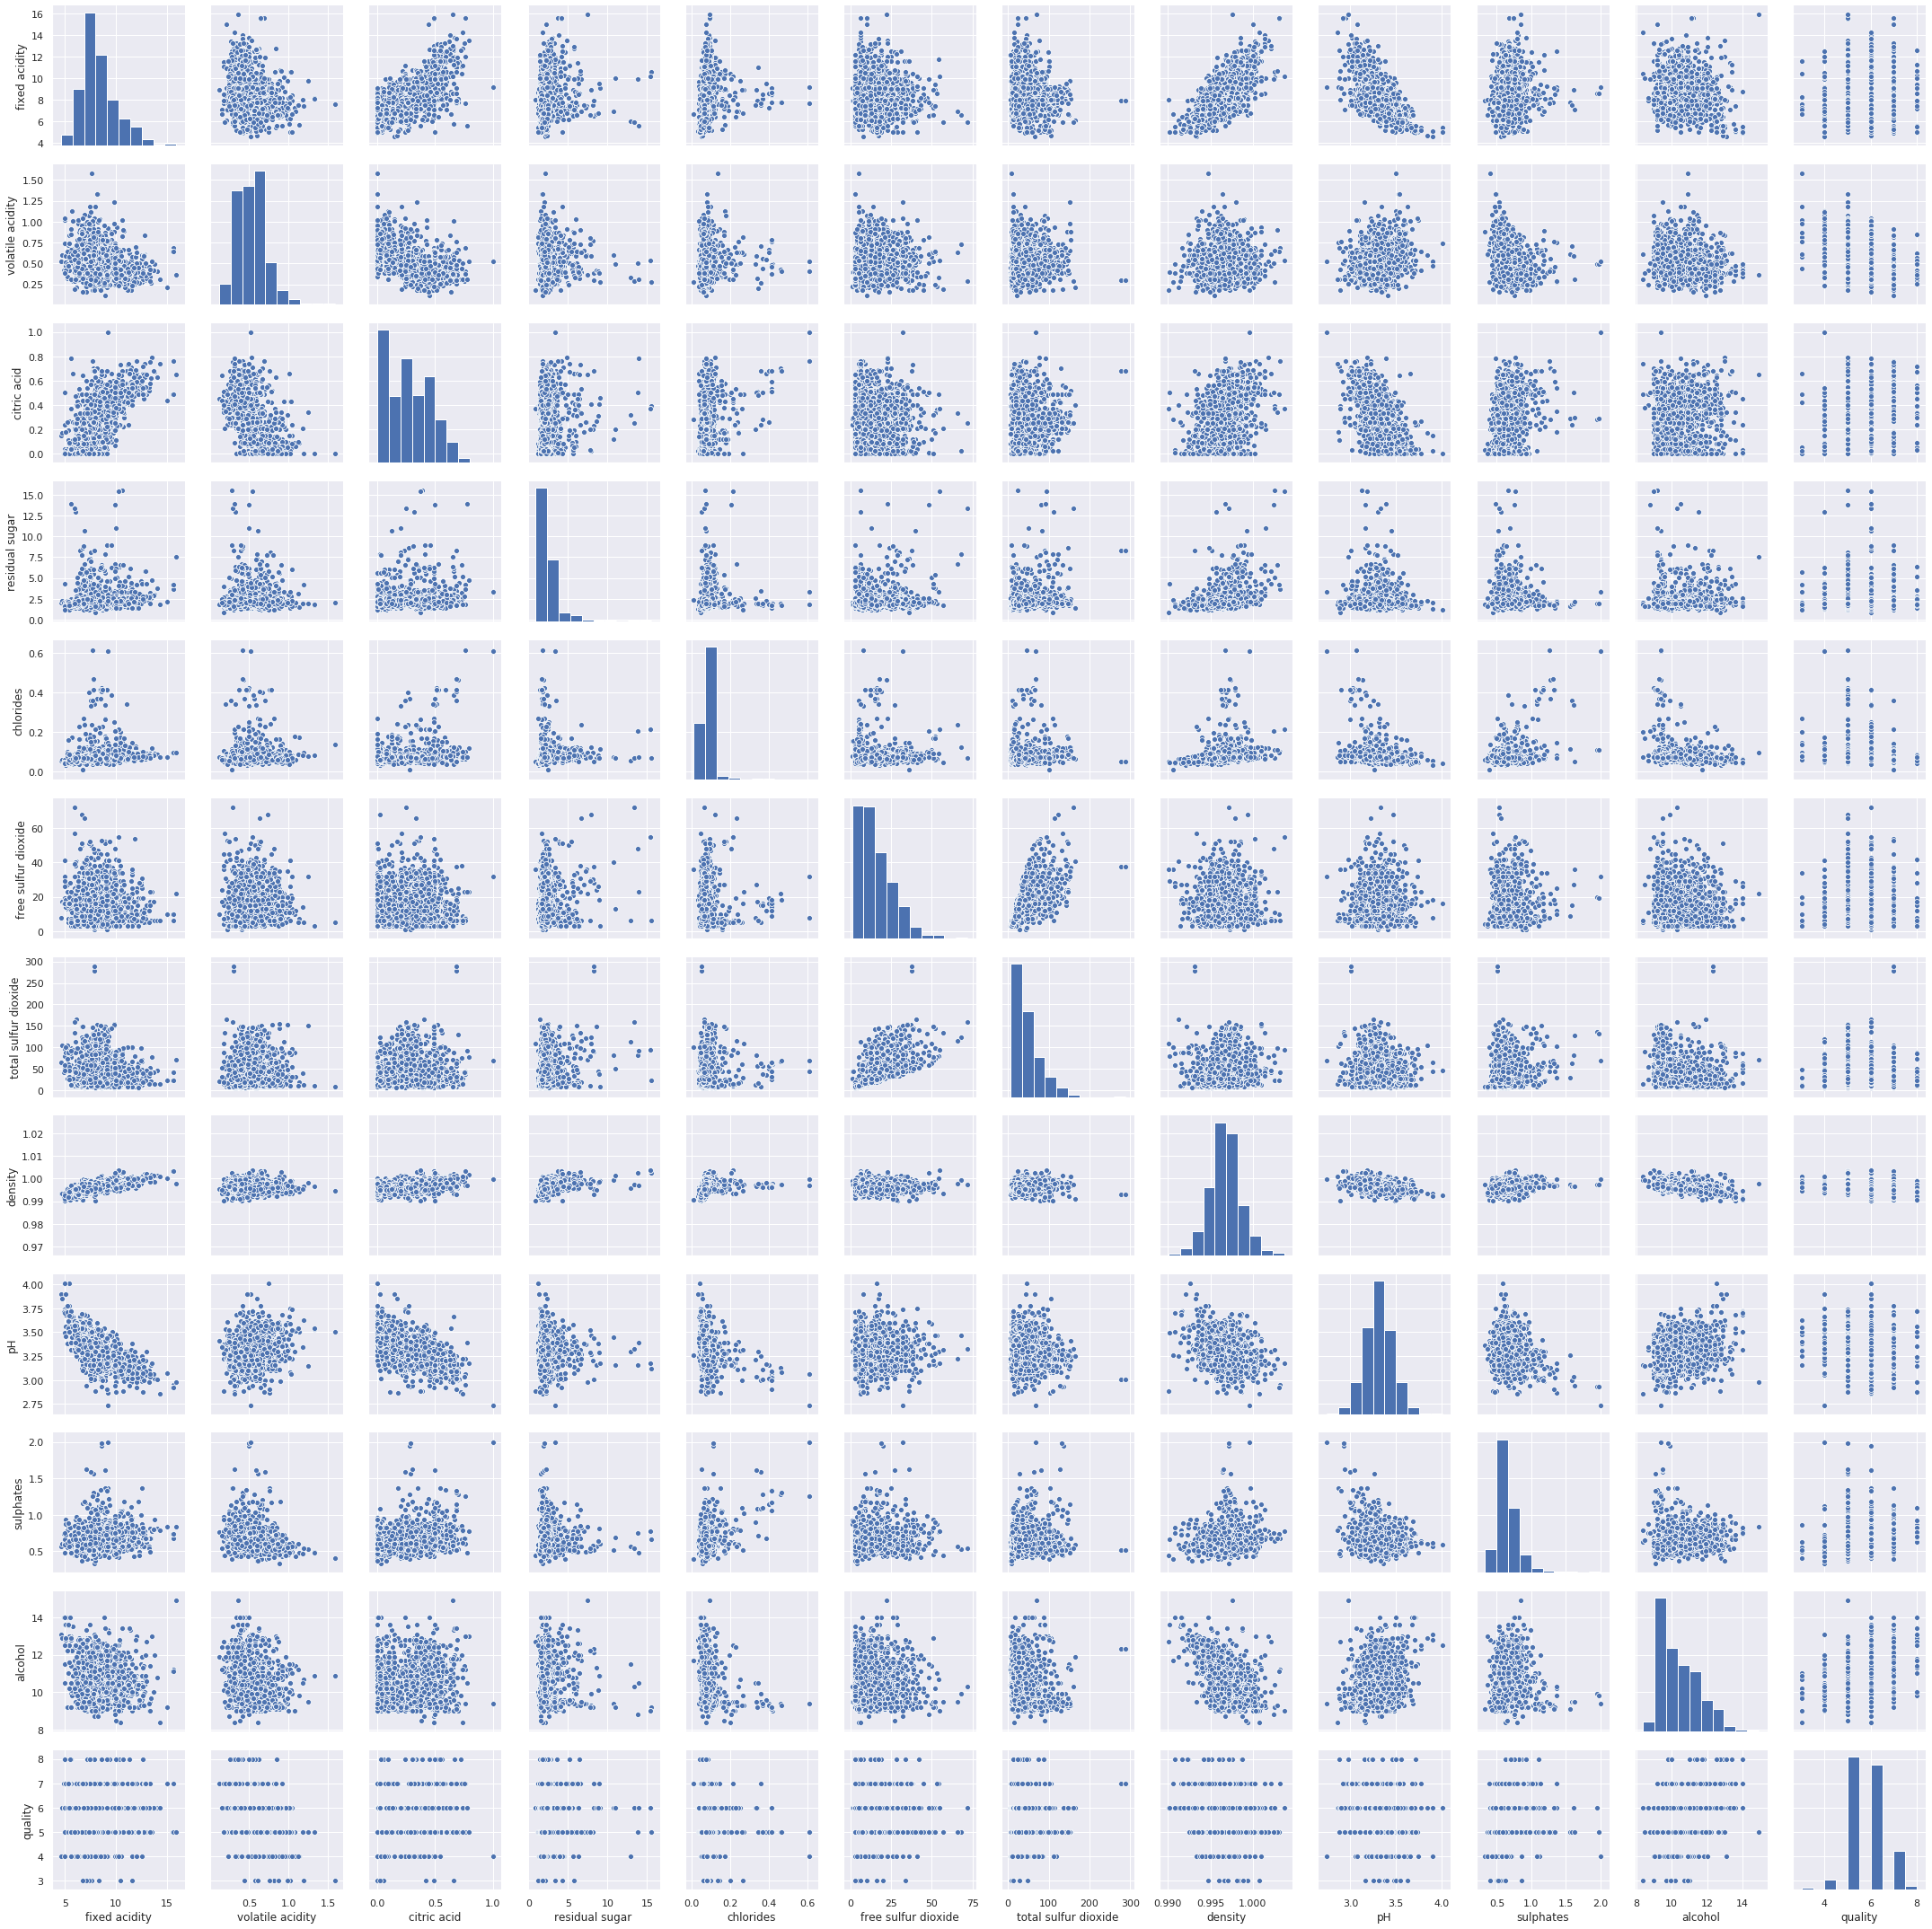

In [5]:
sns.pairplot(df_wine);

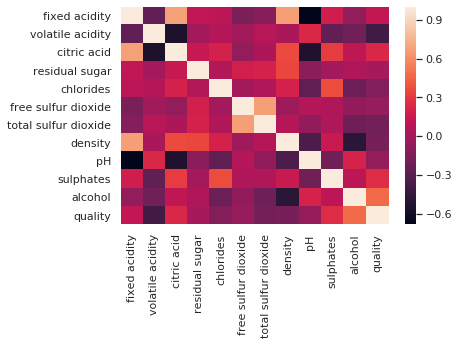

In [15]:
fig = sns.heatmap(df_wine.corr());

## Выбор признаков

Я наблюдаю сильную обратную корреляцию между фичами pH и fixed acidity, также вижу сильную корреляцию между все тем же pH и citric acid; Это логично, потому что мы знаем, что pH линейно зависит от различных кислот в веществе, поэтому имеет смысл убрать признак pH

In [42]:
data_proc = df_wine.drop(['pH'], axis=1)

y_df = data_proc['quality']
X_df = data_proc.drop(['quality'], axis=1)

In [38]:
X_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4


### Графики распределения величин

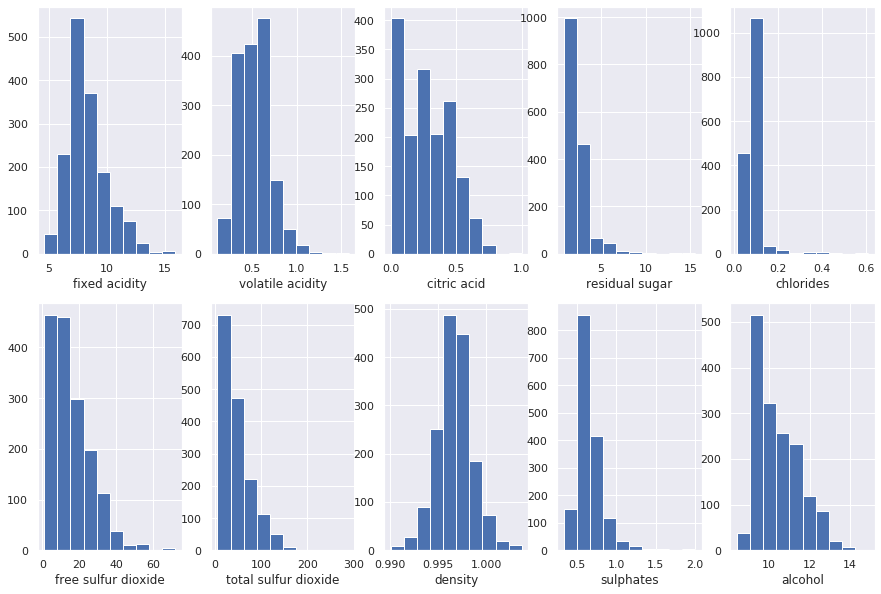

In [49]:
fig, ax = plt.subplots(2, 5, figsize=(15, 10))

ax = ax.ravel()

for i, feature in enumerate(X_df.columns):
    ax[i].hist(X_df[feature])
    ax[i].set_xlabel(feature)

## Предобработка данных

In [44]:
X = X_df.values
y = y_df

### Заполнение пропущенных признаков

In [41]:
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

...не требуется

### Стандартизация значений признаков

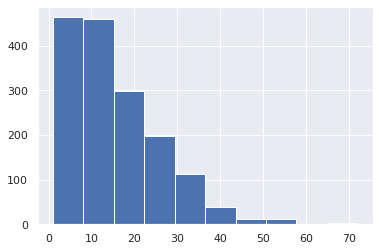

In [39]:
plt.hist(X.iloc[:, 5]);

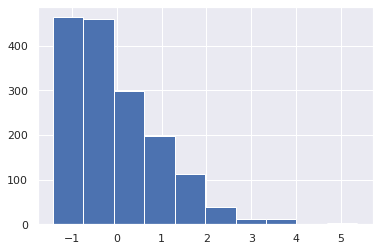

In [50]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = sc.fit_transform(X)

plt.hist(X[:, 5]);

## Выбор метрик

так как это задача классификации, я буду использовать следующие метрики:

1) Accuracy - для самой приблизительной оценки точности работы алгоритмов

2) Метрика F1 - хорошая метрика, объединяющая Precision и Recall

для метрики 2) будут использоваться их взвешенные версии, так как мы заинтересованы в оценке общего качества модели, а не в выяснении того, есть ли у моделей какая-то предрасположенность относительно фич/классов целевого признака

3) ROC AUC

для подсчета данной метрики необходимо будет сделать One Hot Encoding целевого признака и возвращаемых моделью предсказаний так как реализация метода для подсчета данной метрики в библиотеке sklearn подразумевает именно такую форму входных данных

In [107]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categories='auto')
ohe.fit(y[:, None])

def evaluate_model(m, X, y_true):
    ret = {}
    y_pred = m.predict(X)
    
    ret['accuracy_score'] = accuracy_score(y_true, y_pred)
    ret['f1_score'] = f1_score(y_true, y_pred, labels=np.unique(y_pred),
                               average='weighted')
    
    y_true_ohed = ohe.transform(y_true[:, None]).toarray()
    y_pred_ohed = ohe.transform(y_pred[:, None]).toarray()
    ret['ROC_AUC'] = roc_auc_score(y_true_ohed, y_pred_ohed)
    
    return ret

evaluations = {}

## Выбор наиболее подходящих моделей

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Формирование обучающей и тестовой выборок

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train.shape, y_train.shape

((1199, 10), (1199,))

## Построение базового решения

In [114]:
evaluations['lr'] = {}

lr = LogisticRegression(solver='liblinear', multi_class='auto')

lr.fit(X_train, y_train)

evaluations['lr']['baseline'] = evaluate_model(lr, X_test, y_test)
evaluations['lr']['baseline']

{'accuracy_score': 0.5775,
 'f1_score': 0.5680130885696856,
 'ROC_AUC': 0.565175226253719}

In [115]:
evaluations['svc'] = {}

svc = SVC(kernel='rbf', C=1.0, gamma='scale')

svc.fit(X_train, y_train)

evaluations['svc']['baseline'] = evaluate_model(svc, X_test, y_test)
evaluations['svc']['baseline']

{'accuracy_score': 0.6125,
 'f1_score': 0.617136830817094,
 'ROC_AUC': 0.5858649396187193}

In [116]:
evaluations['dt'] = {}

dt = DecisionTreeClassifier(max_depth=10)

dt.fit(X_train, y_train)

evaluations['dt']['baseline'] = evaluate_model(dt, X_test, y_test)
evaluations['dt']['baseline']

{'accuracy_score': 0.5925,
 'f1_score': 0.5934459225428125,
 'ROC_AUC': 0.6089035841110012}

In [117]:
evaluations['rf'] = {}

rf = RandomForestClassifier(n_estimators=10, max_depth=10)

rf.fit(X_train, y_train)

evaluations['rf']['baseline'] = evaluate_model(rf, X_test, y_test)
evaluations['rf']['baseline']

{'accuracy_score': 0.64,
 'f1_score': 0.6485523070222536,
 'ROC_AUC': 0.602088536823551}

In [118]:
evaluations['gb'] = {}

gb = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1)

gb.fit(X_train, y_train)

evaluations['gb']['baseline'] = evaluate_model(gb, X_test, y_test)
evaluations['gb']['baseline']

{'accuracy_score': 0.6,
 'f1_score': 0.5848513544536272,
 'ROC_AUC': 0.5890369113055317}

## Подбор гиперпараметров для выбранных моделей

In [128]:
from sklearn.model_selection import GridSearchCV

def optimize_params(X, y, cv, **models_paramgrids):
    """
        models_paramgrids = {model_name: (model, param_grid)}
    """
    ret_params = {}
    
    for name, (model, param_grid) in models_paramgrids.items():
        gs = GridSearchCV(model, param_grid, cv=cv)
        
        gs.fit(X, y)
        
        ret_params[name] = gs.best_params_
        
    return ret_params

In [136]:
models_paramgrids = {
    'lr': (
        LogisticRegression(solver='liblinear', multi_class='auto'),
        {
            'C': [10 ** p for p in range(-5, 5)],
            'tol': [10 ** p for p in range (-7, 1)]
        }
    ),
    'svc': (
        SVC(kernel='rbf', gamma='scale'),
        {
            'C': [10 ** p for p in range(-5, 5)],
            'tol': [10 ** p for p in range (-7, 1)]
        }
    ),
    'dt': (
        DecisionTreeClassifier(),
        {
            'max_depth': [None, *list(range(1, 50))],
            'max_features': [None, *list(range(1, X.shape[1]))]
        }
    ),
    'rf': (
        RandomForestClassifier(),
        {
            'n_estimators': list(range(1, 50)),
            'max_depth': [None, *list(range(1, 50))],
        }
    )
}

gb_paramgrid = (
    'gb',
    (
        GradientBoostingClassifier(),
        {
            'n_estimators': list(range(1, 50)),
            'max_depth': list(range(1, 50))
            'learning_rate': [0.01, 0.1, 1, 10],
        }
    )
)

optimized_params = optimize_params(X_train, y_train, cv=5, **models_paramgrids)
optimized_params

{'lr': {'C': 0.1, 'tol': 0.1},
 'svc': {'C': 10, 'tol': 0.1},
 'dt': {'max_depth': 22, 'max_features': 8},
 'rf': {'max_depth': 46, 'n_estimators': 47}}

In [138]:
gb_optimized_params = optimize_params(X_train, y_train, cv=5, gb=gb_paramgrid[1])

In [144]:
optimized_params['gb'] = gb_optimized_params['gb']

optimized_params

{'lr': {'C': 0.1, 'tol': 0.1},
 'svc': {'C': 10, 'tol': 0.1},
 'dt': {'max_depth': 22, 'max_features': 8},
 'rf': {'max_depth': 46, 'n_estimators': 47},
 'gb': {'learning_rate': 0.20506122448979594, 'n_estimators': 49}}

## Построение моделей с найденными оптимальными значениями гиперпараметров

In [145]:
lr_o = LogisticRegression(solver='liblinear', multi_class='auto',
                        **optimized_params['lr'])

lr_o.fit(X_train, y_train)

evaluations['lr']['optimized'] = evaluate_model(lr_o, X_test, y_test)
evaluations['lr']['optimized']

{'accuracy_score': 0.5825,
 'f1_score': 0.5716651503092578,
 'ROC_AUC': 0.5665880747890861}

In [147]:
svc_o = SVC(kernel='rbf', gamma='scale',
            **optimized_params['svc'])

svc_o.fit(X_train, y_train)

evaluations['svc']['optimized'] = evaluate_model(svc_o, X_test, y_test)
evaluations['svc']['optimized']

{'accuracy_score': 0.62,
 'f1_score': 0.6117824666493578,
 'ROC_AUC': 0.6059646135545042}

In [155]:
dt_o = DecisionTreeClassifier(**optimized_params['dt'])

dt_o.fit(X_train, y_train)

evaluations['dt']['optimized'] = evaluate_model(dt_o, X_test, y_test)
evaluations['dt']['optimized']

{'accuracy_score': 0.6075,
 'f1_score': 0.6054193184292364,
 'ROC_AUC': 0.6128723665598758}

In [156]:
rf_o = RandomForestClassifier(**optimized_params['rf'])

rf_o.fit(X_train, y_train)

evaluations['rf']['optimized'] = evaluate_model(rf_o, X_test, y_test)
evaluations['rf']['optimized']

{'accuracy_score': 0.6675,
 'f1_score': 0.6789829903353364,
 'ROC_AUC': 0.6178431322311179}

In [163]:
gb_o = GradientBoostingClassifier(**optimized_params['gb'])

gb_o.fit(X_train, y_train)

evaluations['gb']['optimized'] = evaluate_model(gb_o, X_test, y_test)
evaluations['gb']['optimized']

{'accuracy_score': 0.635,
 'f1_score': 0.6360978217848892,
 'ROC_AUC': 0.6183595650988614}

In [164]:
evaluations

{'lr': {'baseline': {'accuracy_score': 0.5775,
   'f1_score': 0.5680130885696856,
   'ROC_AUC': 0.565175226253719},
  'optimized': {'accuracy_score': 0.5825,
   'f1_score': 0.5716651503092578,
   'ROC_AUC': 0.5665880747890861}},
 'svc': {'baseline': {'accuracy_score': 0.6125,
   'f1_score': 0.617136830817094,
   'ROC_AUC': 0.5858649396187193},
  'optimized': {'accuracy_score': 0.62,
   'f1_score': 0.6117824666493578,
   'ROC_AUC': 0.6059646135545042}},
 'dt': {'baseline': {'accuracy_score': 0.5925,
   'f1_score': 0.5934459225428125,
   'ROC_AUC': 0.6089035841110012},
  'optimized': {'accuracy_score': 0.6075,
   'f1_score': 0.6054193184292364,
   'ROC_AUC': 0.6128723665598758}},
 'rf': {'baseline': {'accuracy_score': 0.64,
   'f1_score': 0.6485523070222536,
   'ROC_AUC': 0.602088536823551},
  'optimized': {'accuracy_score': 0.6675,
   'f1_score': 0.6789829903353364,
   'ROC_AUC': 0.6178431322311179}},
 'gb': {'baseline': {'accuracy_score': 0.6,
   'f1_score': 0.5848513544536272,
   'ROC

## Выводы

Наилучшей моделью для решения задачи классификации по данному датасету оказалась модель случайного леса.

Пространство признаков данного датасета довольно объёмно, поэтому сложно получить гораздо более лучший результат, чем есть. Однако, после оптимизации гиперпараметров модели показали заметное улучшение показываемых результатов.